In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [2]:
!kaggle datasets download -d sujaykapadnis/the-rise-of-ai-based-llms

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/the-rise-of-ai-based-llms
License(s): other
  0% 0.00/4.20k [00:00<?, ?B/s]
100% 4.20k/4.20k [00:00<00:00, 6.14MB/s]


In [3]:
from zipfile import ZipFile
file_name = "/content/the-rise-of-ai-based-llms.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
!pip install arrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.0 MB/s eta 0:00:00


In [7]:
from pandas import read_csv
from numpy import nan
from arrow import Arrow

MONTH = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def date_transform(arg: str, ):
    pieces = arg.split()
    return Arrow(month=1 + MONTH.index(pieces[0][:3]), day=15, year=int(pieces[1]),).datetime

df = read_csv('/content/The Rise of AI-Based Large Language Models (LLMs) - LLM data.csv',
                skiprows=1,).drop(columns=['link', 'note / * = parameters undisclosed'])
df['year'] = df['date'].apply(func=lambda x: int(x.split()[1]))
df['Date'] = df['date'].apply(func=date_transform)
df['parameters (bn)'] = df['trained on x billion parameters'].apply(func=lambda x: float(x) if x.replace('.', '').isnumeric() else nan)

# let's consolidate some owners somewhat arbitrarily
owners = {
    'Meta / Facebook': 'Meta',
    'Facebook': 'Meta',
    'Meta AI': 'Meta',
    'OpenAI / Microsoft': 'OpenAI / Microsoft',
    'Microsoft / OpenAI' : 'OpenAI / Microsoft',
    'OpenAI': 'OpenAI / Microsoft',
    'Microsoft': 'OpenAI / Microsoft',
    'Open AI / Microsoft': 'OpenAI / Microsoft',
    'Google' : 'Google / DeepMind',
    'DeepMind' : 'Google / DeepMind',
    'Google Deepmind': 'Google / DeepMind',
}
df['Owner'] = df['owner'].apply(func=lambda x: owners[x] if x in owners.keys() else x)
df.head(n=5)

,name,owner,trained on x billion parameters,date,year,Date,parameters (bn),Owner
0,BERT,Google,0.34,Oct 2018,2018,2018-10-15 00:00:00+00:00,0.34,Google / DeepMind
1,GPT-2,OpenAI,1.5,Feb 2019,2019,2019-02-15 00:00:00+00:00,1.50,OpenAI / Microsoft
2,T5,Google,11,Oct 2019,2019,2019-10-15 00:00:00+00:00,11.00,Google / DeepMind
3,Megatron-11B,Meta / Facebook,11,Apr 2020,2020,2020-04-15 00:00:00+00:00,11.00,Meta
4,BlenderBot1,Meta / Facebook,9.4,Apr 2020,2020,2020-04-15 00:00:00+00:00,9.40,Meta


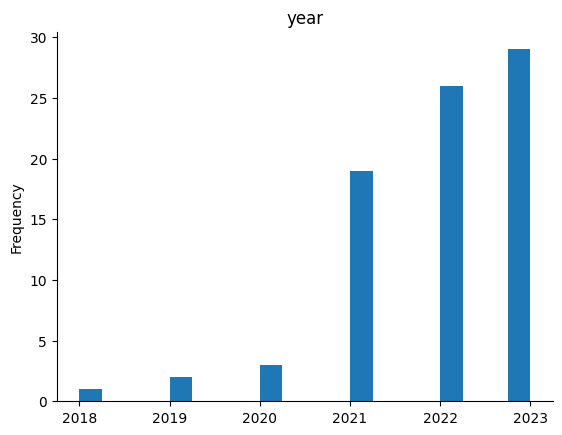

In [9]:
# @title year
from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

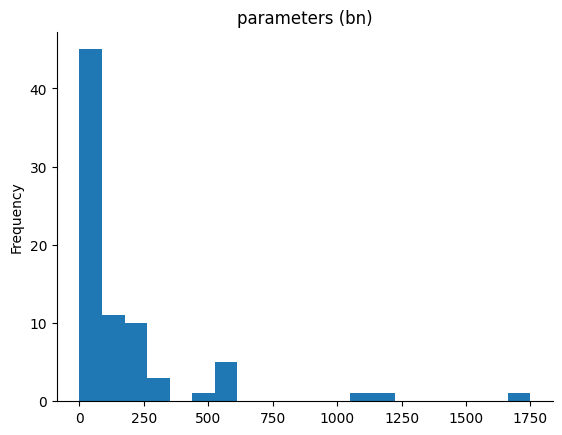

In [10]:
# @title parameters (bn)
from matplotlib import pyplot as plt
df['parameters (bn)'].plot(kind='hist', bins=20, title='parameters (bn)')
plt.gca().spines[['top', 'right',]].set_visible(False)

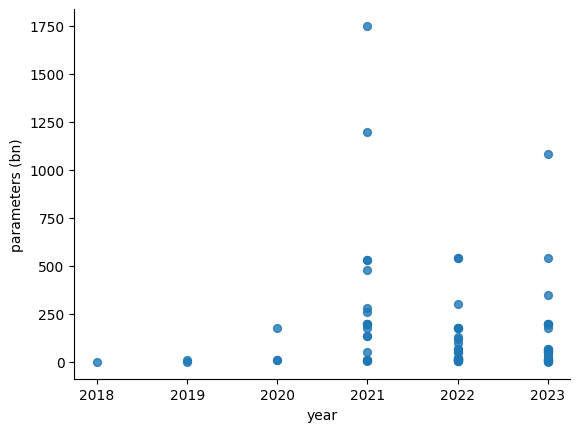

In [11]:
# @title year vs parameters (bn)
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='year', y='parameters (bn)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

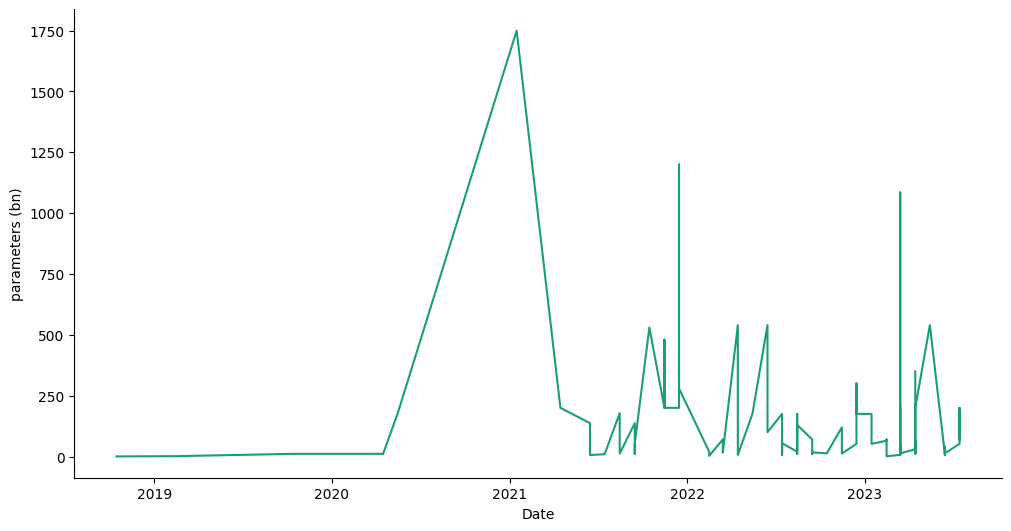

In [13]:
# @title Date vs parameters (bn)
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['parameters (bn)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('parameters (bn)')

In [16]:
from plotly.express import scatter
scatter(data_frame=df.sort_values(by='Owner'), x='Date', y='parameters (bn)', hover_name='name', color='Owner', height=900, log_y=True,
       trendline='ols', trendline_scope='overall')

In [12]:
from plotly.express import bar
bar(data_frame=df, x='Owner', color='year')

In [14]:
100 * round(sum(df['year'] > 2022) / len(df), 2)

36.0

In [15]:
from plotly.express import histogram
histogram(data_frame=df, x='year', )

In [17]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [18]:
!kaggle datasets download -d samuelromerofortin/ai-chatbots-perceptions-studentsstafffaculty

Dataset URL: https://www.kaggle.com/datasets/samuelromerofortin/ai-chatbots-perceptions-studentsstafffaculty
License(s): MIT
  0% 0.00/5.63k [00:00<?, ?B/s]
100% 5.63k/5.63k [00:00<00:00, 8.04MB/s]


In [19]:
from zipfile import ZipFile
file_name = "/content/ai-chatbots-perceptions-studentsstafffaculty.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Perceptions_towards_AI_Survey.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 28 columns):
 #   Column                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                              --------------  ----- 
 0   1.What is your role at the university?                                                                                                                              206 non-null    object
 1   2. What is your level of education?                                                                                                                                 206 non-null    object
 2   3. How many years have you been at the university?                                                                        

In [27]:
print(df.columns)

Index(['1.What is your role at the university?',
       '2. What is your level of education?',
       '3. How many years have you been at the university?',
       '4.       Gender: ', '5.       Age:',
       '6. What is your approximate annual income(US$)?\n',
       '7.       Experience using chatbots:',
       '8.       Willingness of use chatbots:',
       '9.       How would you rate the availability of resources and support (e.g., training materials, tutorials, help desks) for using AI chatbots at your institution?',
       '10.       How often do you use technological tools, including AI chatbots, for educational or administrative tasks at your institution?',
       '11. Questions/Statements [(PE)AI chatbots can improve the efficiency of student support services]',
       '11. Questions/Statements [(PE)AI chatbots are effective in resolving student queries compared to traditional methods]',
       '11. Questions/Statements [(EE)Interacting with AI chatbots for student support is 

In [29]:
# Convert the column to numeric type
column_name = '6. What is your approximate annual income(US$)?\n'
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Verify the conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 28 columns):
 #   Column                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                              --------------  -----  
 0   1.What is your role at the university?                                                                                                                              206 non-null    object 
 1   2. What is your level of education?                                                                                                                                 206 non-null    object 
 2   3. How many years have you been at the university?                                                                    

In [30]:
# Print unique values in the column
print(df['6. What is your approximate annual income(US$)?\n'].unique())

[nan]


In [35]:
print(df.columns)

Index(['1.What is your role at the university?',
       '2. What is your level of education?',
       '3. How many years have you been at the university?',
       '4.       Gender: ', '5.       Age:',
       '6. What is your approximate annual income(US$)?\n',
       '7.       Experience using chatbots:',
       '8.       Willingness of use chatbots:',
       '9.       How would you rate the availability of resources and support (e.g., training materials, tutorials, help desks) for using AI chatbots at your institution?',
       '10.       How often do you use technological tools, including AI chatbots, for educational or administrative tasks at your institution?',
       '11. Questions/Statements [(PE)AI chatbots can improve the efficiency of student support services]',
       '11. Questions/Statements [(PE)AI chatbots are effective in resolving student queries compared to traditional methods]',
       '11. Questions/Statements [(EE)Interacting with AI chatbots for student support is 

In [43]:
import pandas as pd

# Load the dataset
# Assuming the data is stored in a CSV file named 'survey_data.csv'
df = pd.read_csv('/content/Perceptions_towards_AI_Survey.csv')

# Demographic Segmentation
# Age segmentation
def age_segment(age):
    if age < 20:
        return '<20'
    elif 20 <= age < 30:
        return '20-30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    else:
        return '>50'
df['5.       Age:'] = pd.to_numeric(df['5.       Age:'], errors='coerce')
# Gender segmentation
gender_mapping = {
    'Male': 'Male',
    'Female': 'Female',
    'Prefer not to say': 'Prefer not to say'
}
df['Gender Group'] = df['4.       Gender: '].map(gender_mapping)

# Income segmentation
def income_segment(income):
    if income == '$25,001-$50,000':
        return '$25,001-$50,000'
    elif income == 'Less than $25,000':
        return '<$25,000'
    else:
        return '> $50,000'

df['Income Bracket'] = df['6. What is your approximate annual income(US$)?\n'].apply(lambda x: income_segment(x))

# Psychographic Segmentation
# Experience using chatbots segmentation
experience_mapping = {
    'No': 'None',
    'Yes': 'Some',
    'Very Poor': 'Some',
    'Average': 'Some',
    'Good': 'Some',
    'Excellent': 'Excellent'
}
df['Experience Group'] = df['7.       Experience using chatbots:'].map(experience_mapping)

# Willingness to use chatbots segmentation
willingness_mapping = {
    'Strongly Disagree': 'Disagree',
    'Disagree': 'Disagree',
    'Neutral': 'Neutral',
    'Agree': 'Agree',
    'Strongly Agree': 'Agree'
}
df['Willingness Group'] = df['8.       Willingness of use chatbots:'].map(willingness_mapping)

# Satisfaction level segmentation
satisfaction_mapping = {
    'Very Dissatisfied': 'Dissatisfied',
    'Dissatisfied': 'Dissatisfied',
    'Neutral': 'Neutral',
    'Satisfied': 'Satisfied',
    'Very Satisfied': 'Satisfied'
}
df['Satisfaction Group'] = df['12. Overall, how satisfied are you with your experience using AI chatbots for student support services? [-]'].map(satisfaction_mapping)

# Print the segmented dataframe
print(df[['5.       Age:', 'Gender Group', 'Income Bracket', 'Experience Group', 'Willingness Group', 'Satisfaction Group']])


     5.       Age: Gender Group   Income Bracket Experience Group  \
0              NaN         Male  $25,001-$50,000             None   
1              NaN         Male         <$25,000             Some   
2              NaN       Female         <$25,000             Some   
3              NaN         Male         <$25,000             Some   
4              NaN         Male        > $50,000             Some   
..             ...          ...              ...              ...   
201            NaN       Female  $25,001-$50,000             Some   
202            NaN         Male  $25,001-$50,000             Some   
203            NaN         Male        > $50,000             Some   
204            NaN       Female        > $50,000             Some   
205            NaN       Female         <$25,000             Some   

    Willingness Group Satisfaction Group  
0                 NaN          Satisfied  
1                 NaN          Satisfied  
2                 NaN            Neutral  

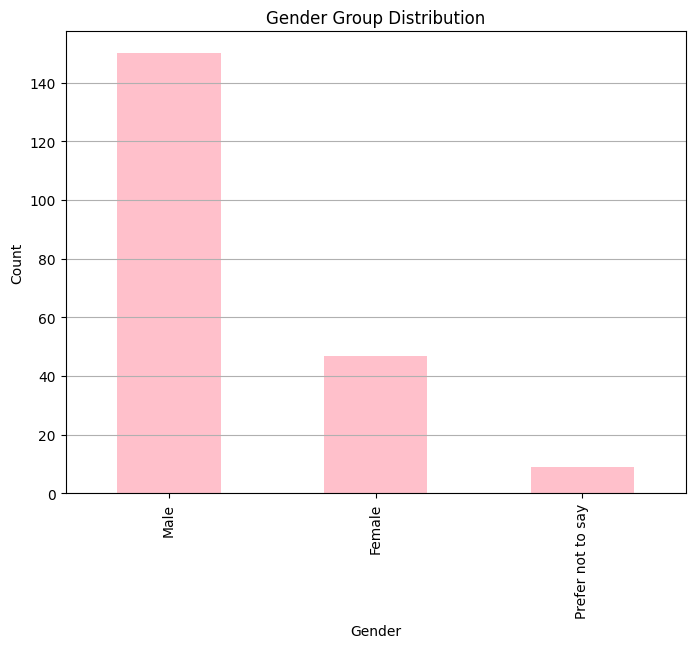

In [49]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(8, 6))
df['Gender Group'].value_counts().plot(kind='bar', color='pink')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Group Distribution')
plt.grid(axis='y')
plt.show()


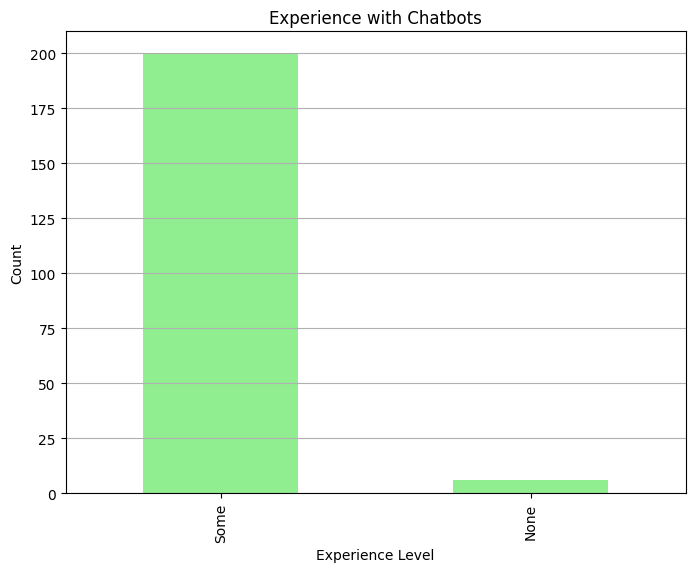

In [50]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(8, 6))
df['Experience Group'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Experience with Chatbots')
plt.grid(axis='y')
plt.show()


The Willingness Group column has no non-null values.
[nan]


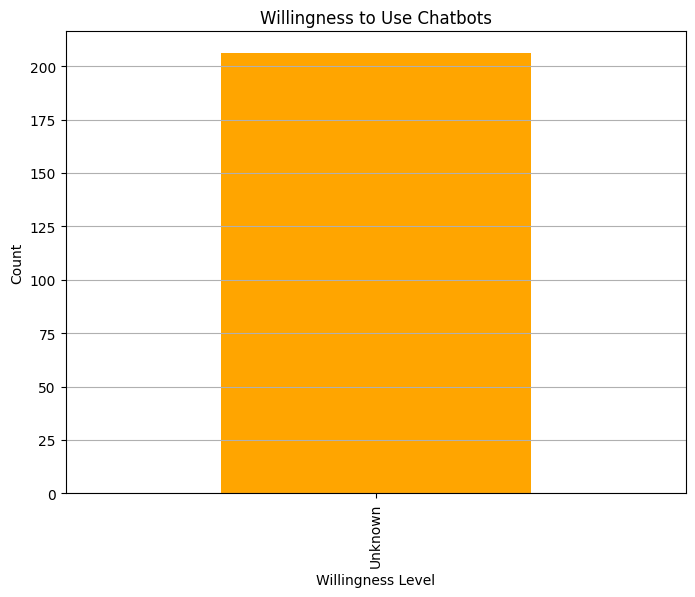

In [56]:
import matplotlib.pyplot as plt
if df.empty:
    print("The df DataFrame is empty.")
if 'Willingness Group' not in df.columns:
    print("The Willingness Group column does not exist in the df DataFrame.")
if df['Willingness Group'].isnull().all():
    print("The Willingness Group column has no non-null values.")
print(df['Willingness Group'].unique())

df['Willingness Group'].fillna('Unknown', inplace=True)
df.dropna(subset=['Willingness Group'], inplace=True)

# Plot bar chart
plt.figure(figsize=(8, 6))
df['Willingness Group'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Willingness Level')
plt.ylabel('Count')
plt.title('Willingness to Use Chatbots')
plt.grid(axis='y')
plt.show()


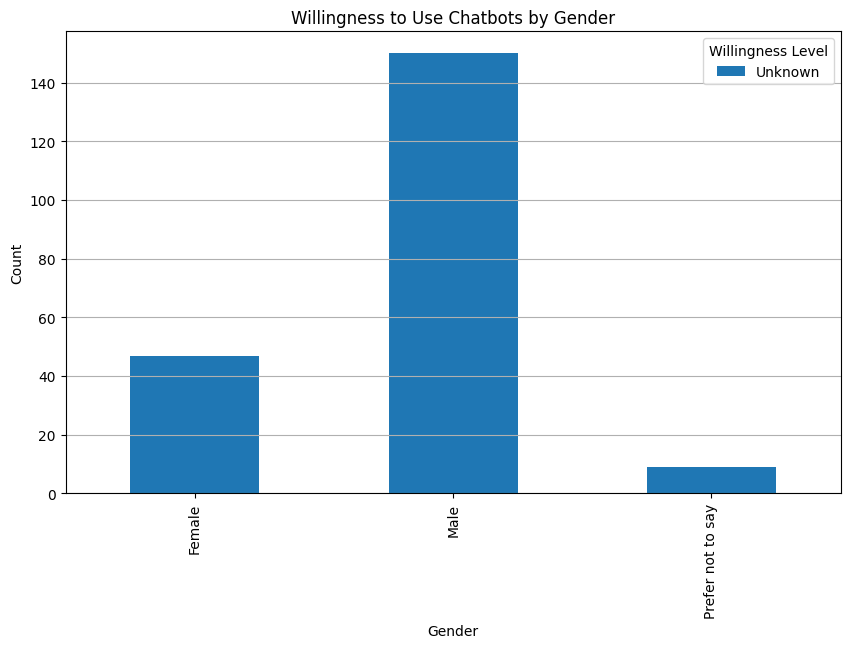

In [57]:
import matplotlib.pyplot as plt

# Group by Gender and Willingness, and plot stacked bar chart
willingness_by_gender = df.groupby(['Gender Group', 'Willingness Group']).size().unstack()
willingness_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Willingness to Use Chatbots by Gender')
plt.grid(axis='y')
plt.legend(title='Willingness Level')
plt.show()


<Figure size 1200x800 with 0 Axes>

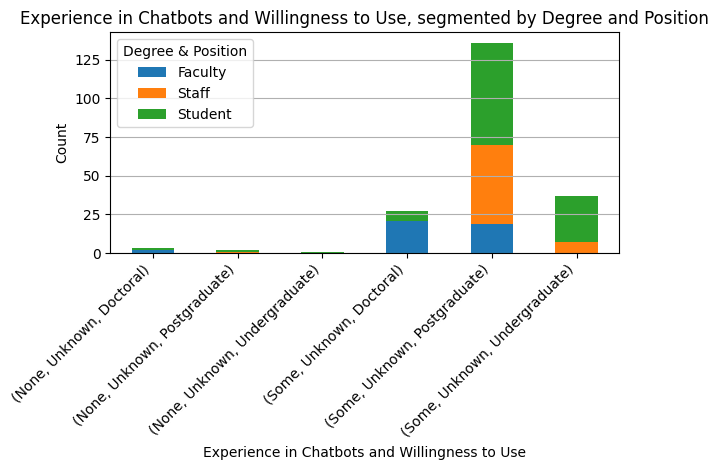

In [58]:
import matplotlib.pyplot as plt

# Fill missing values in 'Willingness Group' column with 'Unknown'
df['Willingness Group'].fillna('Unknown', inplace=True)

# Group by 'Experience Group', 'Willingness Group', '2. What is your level of education?',
# and '1.What is your role at the university?', and unstack the data
experience_willingness_degree_position = df.groupby(['Experience Group', 'Willingness Group',
                                                     '2. What is your level of education?',
                                                     '1.What is your role at the university?']).size().unstack()

# Plot stacked bar chart
plt.figure(figsize=(12, 8))
experience_willingness_degree_position.plot(kind='bar', stacked=True)
plt.xlabel('Experience in Chatbots and Willingness to Use')
plt.ylabel('Count')
plt.title('Experience in Chatbots and Willingness to Use, segmented by Degree and Position')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Degree & Position')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

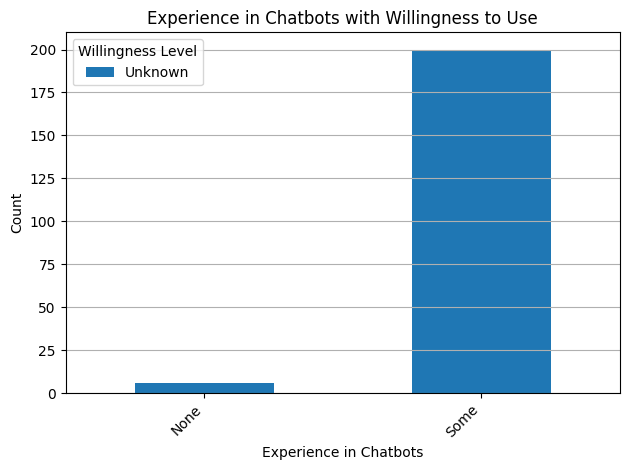

In [59]:
import matplotlib.pyplot as plt

# Fill missing values in 'Willingness Group' column with 'Unknown'
df['Willingness Group'].fillna('Unknown', inplace=True)

# Group by 'Experience Group' and 'Willingness Group', and unstack the data
experience_willingness = df.groupby(['Experience Group', 'Willingness Group']).size().unstack()

# Plot stacked bar chart for Experience with Willingness
plt.figure(figsize=(10, 6))
experience_willingness.plot(kind='bar', stacked=True)
plt.xlabel('Experience in Chatbots')
plt.ylabel('Count')
plt.title('Experience in Chatbots with Willingness to Use')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Willingness Level')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

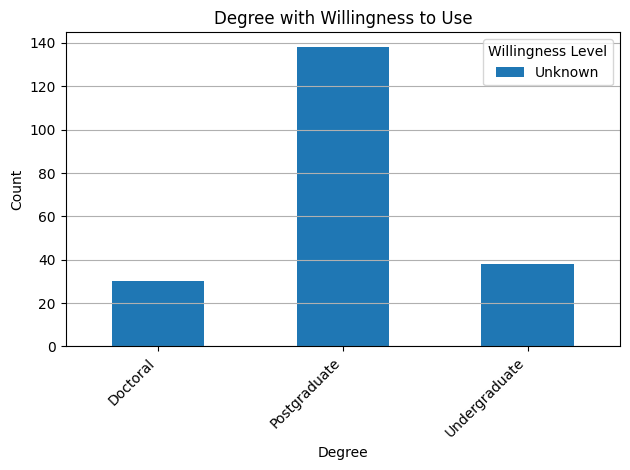

In [60]:
# Fill missing values in 'Degree' column with 'Unknown'
df['2. What is your level of education?'].fillna('Unknown', inplace=True)

# Group by 'Degree' and 'Willingness Group', and unstack the data
degree_willingness = df.groupby(['2. What is your level of education?', 'Willingness Group']).size().unstack()

# Plot stacked bar chart for Degree with Willingness
plt.figure(figsize=(10, 6))
degree_willingness.plot(kind='bar', stacked=True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree with Willingness to Use')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Willingness Level')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

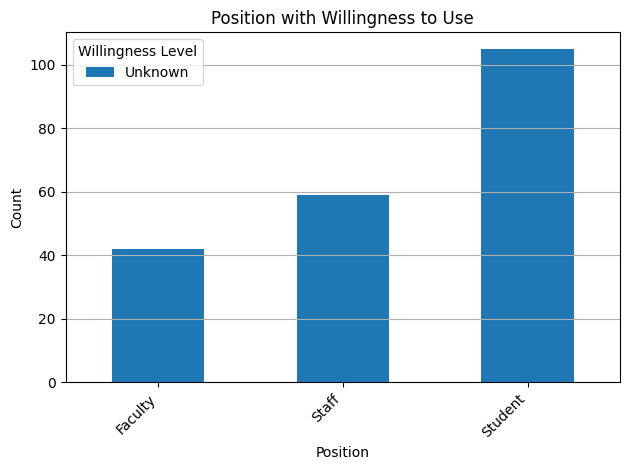

In [61]:
# Fill missing values in 'Position' column with 'Unknown'
df['1.What is your role at the university?'].fillna('Unknown', inplace=True)

# Group by 'Position' and 'Willingness Group', and unstack the data
position_willingness = df.groupby(['1.What is your role at the university?', 'Willingness Group']).size().unstack()

# Plot stacked bar chart for Position with Willingness
plt.figure(figsize=(10, 6))
position_willingness.plot(kind='bar', stacked=True)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Position with Willingness to Use')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Willingness Level')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
